<a href="https://colab.research.google.com/github/Tverdostup1993/Python_for_ds_tasks/blob/main/%D0%A2%D0%B2%D0%B5%D1%80%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF_%D0%9E_%D0%86_%22HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [53]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm



# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
cars_df = pd.read_csv("/content/drive/MyDrive/Machine Learning from 0 to Hero/Database/cars.csv")

In [9]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [10]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [11]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [12]:
cars_df['Brand'].nunique(), cars_df['Model'].nunique(), cars_df['Fuel_Type'].nunique(), cars_df['Transmission'].nunique(), cars_df['Owner_Type'].nunique()

(11, 58, 2, 2, 3)

In [13]:
cars_df["Owner_Type"].unique()

array(['First', 'Second', 'Third'], dtype=object)

DataFrame загалом має 13 колонок, з них 8 числових та 5 категоріальних колонок.
Серед категоріальних колонок:

*   2 бінарні: Fuel_Type (Тип палива), Transmission (Тип КПП)

*   2 мультикатегоріальні без порядку: Brand, Model — містять багато значень і не мають логічного порядку

*   1 категоріальна з порядком: Owner_Type (First, Second, Third...) — має природне впорядкування

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [14]:
# 1. Вибираємо ознаки (фічі) та цільову змінну
X = cars_df.drop(columns=["Price"])  # всі колонки, крім цільової
y = cars_df["Price"]                 # цільова змінна

# 2. Розділяємо на train і test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

# 3. Перевірка
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (80, 12)
X_test shape:  (20, 12)
y_train shape: (80,)
y_test shape:  (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

<Axes: xlabel='Fuel_Type', ylabel='Count'>

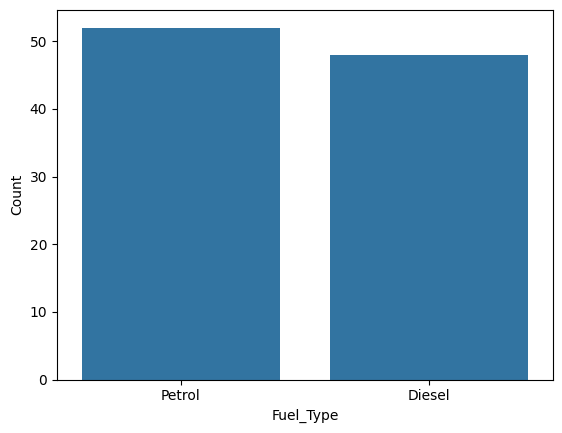

In [15]:
# Рахуємо кількість
fuel_counts = cars_df["Fuel_Type"].value_counts().reset_index()
fuel_counts.columns = ["Fuel_Type", "Count"]

# Малюємо графік
sns.barplot(data=fuel_counts, x="Fuel_Type", y="Count")


In [16]:
# 1. Fuel_Type: знайти найчастішу категорію
fuel_counts = cars_df["Fuel_Type"].value_counts()
top_fuel = fuel_counts.idxmax()

# закодувати: найбільш поширене → 1, інше → 0
X_train["Fuel_Type_bin"] = (X_train["Fuel_Type"] == top_fuel).astype(int)
X_test["Fuel_Type_bin"] = (X_test["Fuel_Type"] == top_fuel).astype(int)

# 2. Transmission
trans_counts = cars_df["Transmission"].value_counts()
top_trans = trans_counts.idxmax()

X_train["Transmission_bin"] = (X_train["Transmission"] == top_trans).astype(int)
X_test["Transmission_bin"] = (X_test["Transmission"] == top_trans).astype(int)

# 3. Перевірка
print("Fuel_Type mapping:")
print(fuel_counts)

print("\nTransmission mapping:")
print(trans_counts)

X_train[["Fuel_Type", "Fuel_Type_bin", "Transmission", "Transmission_bin"]].head()
X_test[["Fuel_Type", "Fuel_Type_bin", "Transmission", "Transmission_bin"]].head()

Fuel_Type mapping:
Fuel_Type
Petrol    52
Diesel    48
Name: count, dtype: int64

Transmission mapping:
Transmission
Automatic    57
Manual       43
Name: count, dtype: int64


,Fuel_Type,Fuel_Type_bin,Transmission,Transmission_bin
17,Petrol,1,Automatic,1
41,Petrol,1,Manual,0
92,Petrol,1,Manual,0
14,Petrol,1,Manual,0
68,Petrol,1,Manual,0


In [17]:
print(X_test["Brand"].nunique())
print(X_test["Brand"].value_counts())

11
Brand
Hyundai       5
Volkswagen    3
Audi          2
Ford          2
Toyota        2
Maruti        1
Honda         1
BMW           1
Tata          1
Mahindra      1
Mercedes      1
Name: count, dtype: int64


In [53]:
# Ініціалізація енкодера
enc = preprocessing.OneHotEncoder()

# Навчаємо на тренувальних
one_hot_train = enc.fit_transform(X_train[['Brand']]).toarray()

#Перевірка, які категорії були знайдені
enc.categories_

# Трансформуємо колонку Brand у X_test у one-hot
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
enc.categories_[0]

# Додаємо ці one-hot колонки до X_test
X_test[enc.categories_[0]] = one_hot_test

#Перевіряємо результат
X_train

KeyError: "None of [Index(['Brand'], dtype='object')] are in the [columns]"

In [18]:
# 1. Ініціалізація енкодера
enc = preprocessing.OneHotEncoder()

# 2. Навчаємо енкодер на колонці Brand у X_train
enc.fit(X_train[['Brand']])

# 3. Трансформуємо Brand у one-hot і створюємо DataFrame
X_train_encoded = pd.DataFrame(enc.transform(X_train[['Brand']]).toarray(),
                                columns=enc.categories_[0],
                                index=X_train.index)

X_test_encoded = pd.DataFrame(enc.transform(X_test[['Brand']]).toarray(),
                               columns=enc.categories_[0],
                               index=X_test.index)

# 4. Об’єднуємо з іншими ознаками, видаливши початкову колонку 'Brand'
X_train = pd.concat([X_train.drop(columns=['Brand']), X_train_encoded], axis=1)
X_test = pd.concat([X_test.drop(columns=['Brand']), X_test_encoded], axis=1)

In [52]:
X_train

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_grouped
83,84,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,T-Roc
55,56,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A5
26,27,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Other
54,55,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Other
19,20,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,Other
2,3,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mustang
6,7,Scorpio,2018,45000,Diesel,Automatic,Second,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Other
27,28,X3,2019,22000,Diesel,Automatic,Second,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Other


In [20]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [21]:
X_test.head()

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


Ми закадували колонку Owner_Type та вивели її в окрему колонку Owner_Type_Codes по принципу Ordinal Encoding: коли категорії мають логічний порядок. Починаючи з 0

Очікуваний результат після трансформацій:

In [22]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [23]:
# Виводимо унікальні моделі для кожного бренда
brand_models = cars_df.groupby("Brand")["Model"].apply(set)
print(brand_models)

Brand
Audi                                   {A4, A6, A3, Q7, A5, Q3}
BMW                  {X3, X5, 5 Series, X1, 3 Series, 7 Series}
Ford          {Aspire, Ranger, EcoSport, Mustang, Figo, Ende...
Honda                                 {City, WR-V, BR-V, Civic}
Hyundai          {Venue, Sonata, Creta, Verna, Elantra, Santro}
Mahindra                                {XUV300, Thar, Scorpio}
Maruti                         {S-Cross, Ertiga, Vitara, Swift}
Mercedes                      {GLC, GLE, C-Class, GLA, E-Class}
Tata             {Altroz, Harrier, Tigor, Nexon, Tiago, Safari}
Toyota        {Innova, Yaris, Innova Crysta, Fortuner, Camry...
Volkswagen           {Polo, Passat, Vento, Tiguan, Ameo, T-Roc}
Name: Model, dtype: object


In [24]:
# Знайдемо топ-5 найпопулярніших моделей по всьому датасету (або лише по X_train — обери що логічніше)
top_models = X_train["Model"].value_counts().nlargest(5).index.tolist()

# Створимо нову колонку з групованими назвами моделей
X_train["Model_grouped"] = X_train["Model"].apply(lambda x: x if x in top_models else "Other")
X_test["Model_grouped"] = X_test["Model"].apply(lambda x: x if x in top_models else "Other")

In [68]:
# Ініціалізуємо та тренуємо тільки на X_train
ohe = preprocessing.OneHotEncoder()
one_hot_train = ohe.fit_transform(X_train[["Model_grouped"]]).toarray()
ohe.categories_

ohe_hot_test = ohe.transform(X_test[['Model_grouped']]).toarray()
ohe.categories_[0]

columns = ohe.get_feature_names_out(["Model_grouped"])

# Додаємо ці one-hot колонки до X_test
X_test[ohe.categories_[0]] = ohe_hot

#Перевіряємо результат
X_test

NameError: name 'ohe_hot' is not defined

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [25]:
# Вибираємо лише числові колонки з X_train
X_train_num = X_train.select_dtypes(include='number')

# Обʼєднуємо числові ознаки з y_train
train_num_df = pd.concat([X_train_num, y_train], axis=1)

# Обчислюємо матрицю кореляції
correlation_matrix = train_num_df.corr()
price_corr = correlation_matrix["Price"].drop("Price")
correlation_matrix

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.000979
Fuel_Type_bin,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.110782
Transmission_bin,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.328858


In [26]:
strong_corr = price_corr[price_corr.abs() > 0.5]
print("Ознаки, що мають сильну кореляцію з Price:\n", strong_corr)

Ознаки, що мають сильну кореляцію з Price:
 Mileage            -0.638404
Engine              0.710561
Power               0.849137
Transmission_bin    0.680731
Name: Price, dtype: float64


Найсильнішими факторами, що впливають на ціну авто, є його потужність, об’єм двигуна, тип коробки передач і витрати пального.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [31]:
# Видалили нечислові колонки з X_train та X_test, залишивши лише числові для моделі:
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)
X_test_numeric

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_bin,Transmission_bin,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
31,32,2017,32000,22,1582,126,5,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
89,90,2018,32000,17,1197,81,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
15,16,2017,42000,25,1498,98,5,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21,22,2020,15000,18,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
60,61,2019,24000,17,1497,113,5,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
# Натренували модель лінійної регресії на тренувальному наборі
lr_model = LinearRegression()
lr_model.fit(X_train_numeric, y_train)

LinearRegression()

In [29]:
# Зробили передбачення для тренувального та тестового набору
y_train_pred = lr_model.predict(X_train_numeric)
y_test_pred = lr_model.predict(X_test_numeric)

In [33]:
y_train

,Price
83,1600000
55,2600000
26,3200000
54,650000
19,2500000
...,...
3,600000
2,2500000
6,900000
27,2800000


In [40]:
# 1. Вибираємо лише числові колонки (якщо ще не зроблено)
X_train_numeric = X_train.select_dtypes(include='number')
X_test_numeric = X_test.select_dtypes(include='number')

# 2. Тренуємо модель
model = LinearRegression()
model.fit(X_train_numeric, y_train)

# 3. Робимо передбачення
y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)

# 4. Обчислюємо RMSE
rmse_train = mean_squared_error(y_train, y_train_pred)
rmse_test = mean_squared_error(y_test, y_test_pred)

print("RMSE на train:", round(rmse_train, 2))
print("RMSE на test:", round(rmse_test, 2))

RMSE на train: 44223389066.45
RMSE на test: 66657718502.53


In [41]:
print(y_train.dtype)
print(y_train.head(5))

int64
83    1600000
55    2600000
26    3200000
54     650000
19    2500000
Name: Price, dtype: int64


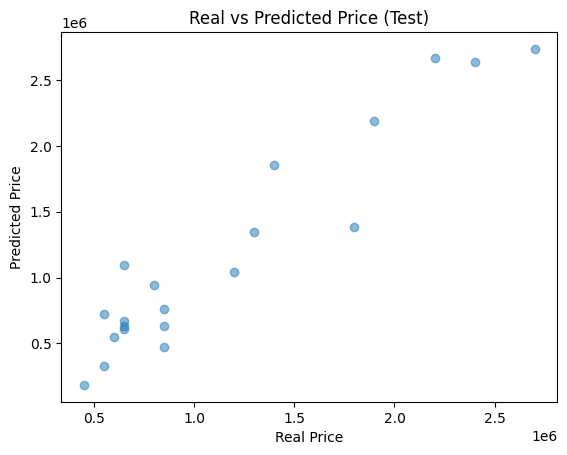

In [42]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Real Price")
plt.ylabel("Predicted Price")
plt.title("Real vs Predicted Price (Test)")
plt.show()

In [43]:
# Імена ознак (фічей)
feature_names = X_train_numeric.columns

# Коефіцієнти з моделі
coefficients = lr_model.coef_

# Перетворюємо в таблицю для зручності
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

coef_df

,Feature,Coefficient
9,Audi,756997.385514
16,Mercedes,736415.668397
10,BMW,731220.832767
8,Transmission_bin,239529.365523
18,Toyota,124349.231323
20,Owner_Type_Codes,64763.989506
5,Power,6101.071345
0,Car_ID,198.416545
2,Kilometers_Driven,-10.294777
4,Engine,-32.552264


Графік розсіювання передбачень проти реальних значень на тестовій вибірці показує, що модель LinearRegression частково вловлює загальну тенденцію, але точність залишає бажати кращого. Багато точок лежать далеко від ідеальної діагоналі, що вказує на значні відхилення у передбаченнях. Це може бути наслідком малого обсягу даних, високої варіативності цін, ненормалізованих ознак або слабкої моделі.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [48]:
# Ініціалізація скейлера
scaler = StandardScaler()

# Навчаємо на тренувальному наборі та трансформуємо
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Трансформуємо тестовий набір (без навчання)
X_test_scaled = scaler.transform(X_test_numeric)

In [49]:
# Ініціалізація та тренування моделі
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [72]:
# Зібрати ознаки та їхні коефіцієнти в DataFrame
coef_df = pd.DataFrame({
    'Feature': X_train_numeric.columns,
    'Coefficient': model_scaled.coef_
})

# Додамо абсолютне значення для сортування
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

# Відсортуємо за впливом (в абсолютному значенні)
coef_df_sorted = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Виведемо топ-10 найвпливовіших ознак
print(coef_df_sorted.head(10))

             Feature    Coefficient  Abs_Coefficient
5              Power  496769.214899    496769.214899
16          Mercedes  210048.781148    210048.781148
10               BMW  208407.313783    208407.313783
9               Audi  205600.147769    205600.147769
7      Fuel_Type_bin -183848.018909    183848.018909
13           Hyundai -152304.863911    152304.863911
14          Mahindra -140945.162904    140945.162904
3            Mileage -131715.512030    131715.512030
11              Ford -118209.450311    118209.450311
8   Transmission_bin  116693.768206    116693.768206


Найбільший позитивний вплив на ціну мають характеристики Power (+496 769), що цілком логічно — потужніші авто дорожчі. Також моделі преміум-брендів, як Mercedes (+210 049), BMW (+208 407) та Audi (+205 600), автоматично підвищують вартість. Натомість змінна Fuel_Type_bin (–183 848) свідчить: авто з менш популярним типом пального (в нашому випадку дизель) можуть коштувати менше. Ось це мене смущає, бо виглядає не дуже логічно. Автомобілі марок Hyundai (–152 305) і Mahindra (–140 945) — зазвичай нижчого цінового сегмента. Також цікаво, що Mileage (–131 716) має негативний вплив — чим більше пробіг, тим нижча ціна, що відповідає ринку.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [90]:
# 1. Перетвори відмасштабовані дані назад у DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train.index)

# 2. Додаємо константу
X_train_scaled_const = sm.add_constant(X_train_scaled_df)

# 3. Будуємо модель
model = sm.OLS(y_train, X_train_scaled_const).fit()
for i, name in enumerate(X_train_scaled_const.columns):
    print(f"x{i}: {name}")
print(model_sm.summary())

x0: const
x1: Car_ID
x2: Year
x3: Kilometers_Driven
x4: Mileage
x5: Engine
x6: Power
x7: Seats
x8: Fuel_Type_bin
x9: Transmission_bin
x10: Audi
x11: BMW
x12: Ford
x13: Honda
x14: Hyundai
x15: Mahindra
x16: Maruti
x17: Mercedes
x18: Tata
x19: Toyota
x20: Volkswagen
x21: Owner_Type_Codes
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        21:23:02   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Co

In [91]:
# Виводить тільки назви ознак (без 'const'), які є статистично значущими
significant_features = model_sm.pvalues.loc[model_sm.pvalues < 0.05].drop('const').index.tolist()

print("Статистично значущі ознаки (p < 0.05):")
for feature in significant_features:
    print("-", feature)


Статистично значущі ознаки (p < 0.05):
- x4
- x6
- x8
- x9
- x10
- x11
- x12
- x14
- x15
- x16
- x17
- x20


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [93]:
# 1. Отримуємо список всіх назв ознак, включаючи 'const'
all_features = X_train_scaled_const.columns

# 2. Формуємо словник відповідності: xN -> справжня назва
x_to_feature = {f'x{i}': name for i, name in enumerate(all_features)}

# 3. Перетворюємо significant_features з xN у справжні назви
significant_real_names = [x_to_feature[x] for x in significant_features if x in x_to_feature]

# 4. Вибираємо відповідні стовпці з DataFrame
X_train_significant = X_train_scaled_df[significant_real_names]

# 5. Додаємо константу
X_train_significant_const = sm.add_constant(X_train_significant)

# 6. Тренуємо модель
model_significant = sm.OLS(y_train, X_train_significant_const).fit()

# 7. Виводимо результат
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           4.12e-39
Time:                        21:26:17   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.68e+06   2.78e+04  

R² та Adj. R² майже не змінились (з 0.959/0.945 до 0.951/0.943), отже, спрощення моделі до статистично значущих ознак не погіршило якість і зробило модель більш інтерпретованою.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [96]:
# Крок 1: Отримуємо список колонок з константою
feature_names = ['const'] + list(X_train_scaled_df.columns)

# Крок 2: Створюємо мапінг xN -> назва
x_to_colname = {f'x{i}': name for i, name in enumerate(feature_names)}

# Крок 3: Вибираємо значущі з p < 0.25 (крім const)
significant_xnames = model_sm.pvalues[model_sm.pvalues < 0.25].drop('const').index

# Крок 4: Перетворюємо xN у реальні назви колонок
selected_features = [x_to_colname[x] for x in significant_xnames]

# Крок 5: Формуємо підмножину DataFrame
X_train_p025 = X_train_scaled_df[selected_features]
X_train_p025_const = sm.add_constant(X_train_p025)

# Крок 6: Створюємо модель
model_p025 = sm.OLS(y_train, X_train_p025_const).fit()
print(model_p025.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Thu, 19 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        21:33:39   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

R² і Adj. R² майже не змінились: з 0.959 / 0.945 (усі ознаки) до 0.958 / 0.948 (ознаки з p < 0.25).
Різниця незначна, тому я б обрала модель з p < 0.25 — вона простіша, але дає практично ту ж точність.